<a href="https://colab.research.google.com/github/myra349/vistarnetra/blob/main/FACULTY_ANALYSISipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TOP 10 FACULTY PERFORMERS:
             status  classes_taken  classes_scheduled  late  early_exit  \
faculty_id                                                               
F139           107            396                476    40          43   
F150           109            398                482    45          49   
F133           106            398                479    41          47   
F108           110            392                466    58          53   
F130           104            392                483    40          50   
F145           105            376                476    42          50   
F148           103            379                482    38          48   
F118           106            399                483    53          46   
F140           105            379                462    50          41   
F123           103            375                467    45          43   

            attendance_rate  class_efficiency  punctuality_score  \
faculty_id    

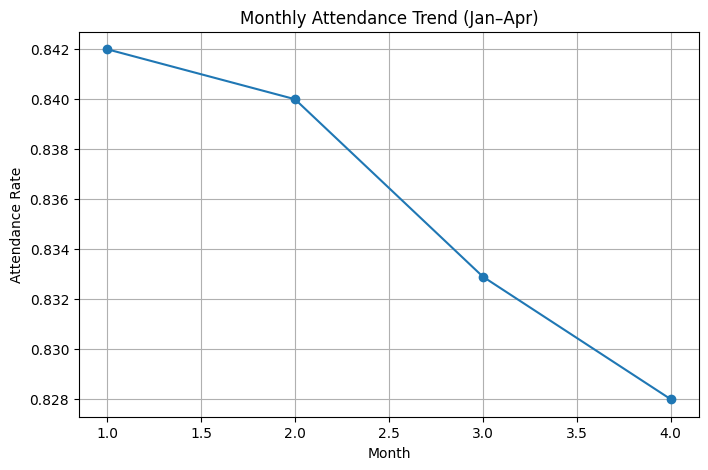

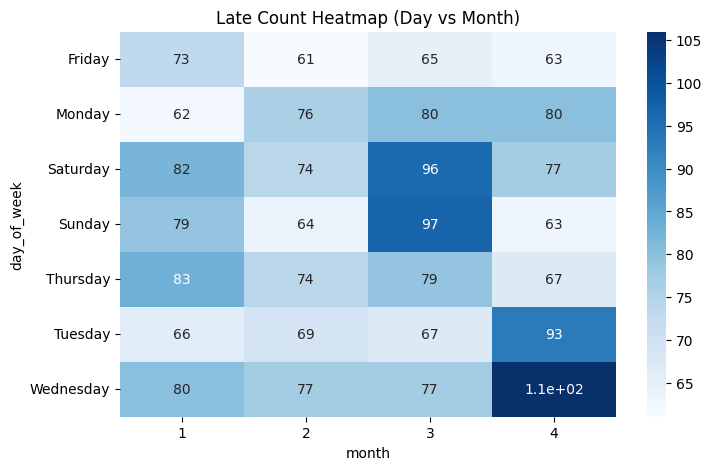

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# LOAD 4 MONTH DATASETS
# ---------------------------
# Removed the leading '/' as files are typically in the current working directory
# or in a specific path if mounted from Google Drive.
# Please ensure these files are uploaded to your Colab environment or
# adjust the paths if they are in Google Drive (e.g., '/content/drive/MyDrive/path/to/file.csv').
jan = pd.read_csv("faculty jan month data.csv")
feb = pd.read_csv("/content/faculty feb month data.csv")
mar = pd.read_csv("/content/faculty march data.csv")
apr = pd.read_csv("/content/faculty april data.csv")

df = pd.concat([jan, feb, mar, apr], ignore_index=True)

df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.day_name()

# ---------------------------
# MONTH SUMMARY
# ---------------------------
monthly_summary = df.groupby(["faculty_id", "month"]).agg({
    "status": lambda x: (x == "present").sum(),
    "classes_taken": "sum",
    "classes_missed": "sum",
    "late": "sum",
    "early_exit": "sum",
}).reset_index()

monthly_summary.rename(columns={"status": "days_present"}, inplace=True)

# ---------------------------
# FACULTY OVERALL STATS
# ---------------------------
overall_stats = df.groupby("faculty_id").agg({
    "status": lambda x: (x == "present").sum(),
    "classes_taken": "sum",
    "classes_scheduled": "sum",
    "late": "sum",
    "early_exit": "sum"
})

overall_stats["attendance_rate"] = overall_stats["status"] / 120  # approx 4 months working days
overall_stats["class_efficiency"] = overall_stats["classes_taken"] / overall_stats["classes_scheduled"]
overall_stats["punctuality_score"] = 1 - (overall_stats["late"] / (overall_stats["status"] + 1))

overall_stats["performance_score"] = (
    overall_stats["attendance_rate"] * 0.5 +
    overall_stats["class_efficiency"] * 0.3 +
    overall_stats["punctuality_score"] * 0.2
) * 100

# ---------------------------
# TOP 10 & BOTTOM 10 FACULTY
# ---------------------------
top10 = overall_stats.sort_values("performance_score", ascending=False).head(10)
bottom10 = overall_stats.sort_values("performance_score").head(10)

print("\nTOP 10 FACULTY PERFORMERS:\n", top10)
print("\nBOTTOM 10 FACULTY:\n", bottom10)

# ---------------------------
# MONTH-WISE TREND PLOT
# ---------------------------
trend = df.groupby("month")["status"].apply(lambda x: (x=="present").mean())

plt.figure(figsize=(8,5))
plt.plot(trend.index, trend.values, marker='o')
plt.title("Monthly Attendance Trend (Jan–Apr)")
plt.xlabel("Month")
plt.ylabel("Attendance Rate")
plt.grid()
plt.show()

# ---------------------------
# HEATMAP (Late Pattern)
# ---------------------------
pivot = df.pivot_table(index="day_of_week", columns="month", values="late", aggfunc="sum")

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Late Count Heatmap (Day vs Month)")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


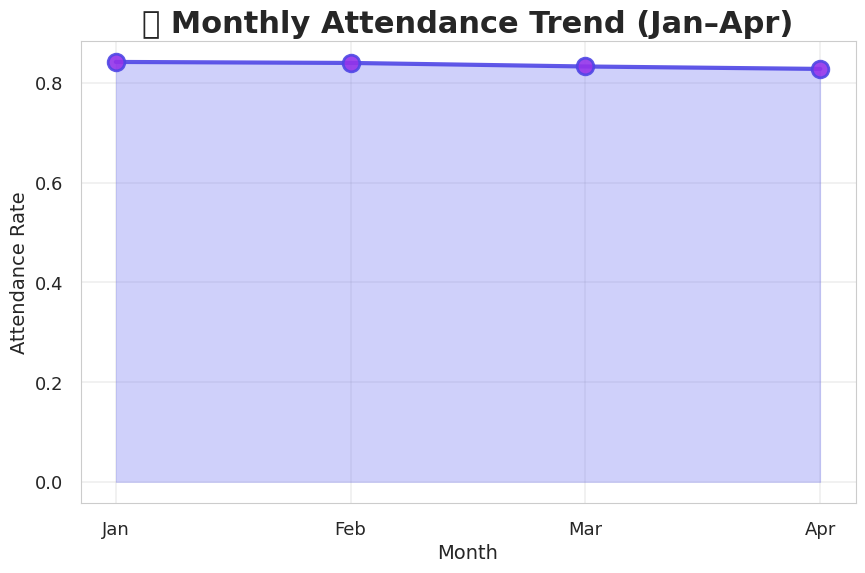

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


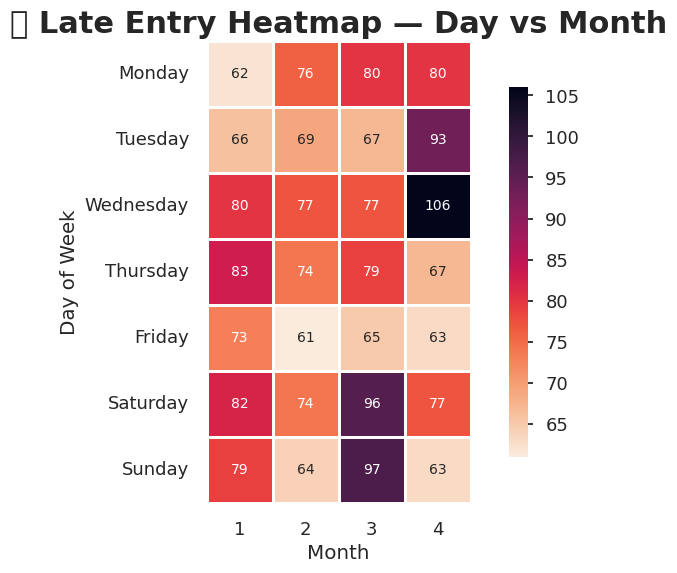

/tmp/ipython-input-798895277.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


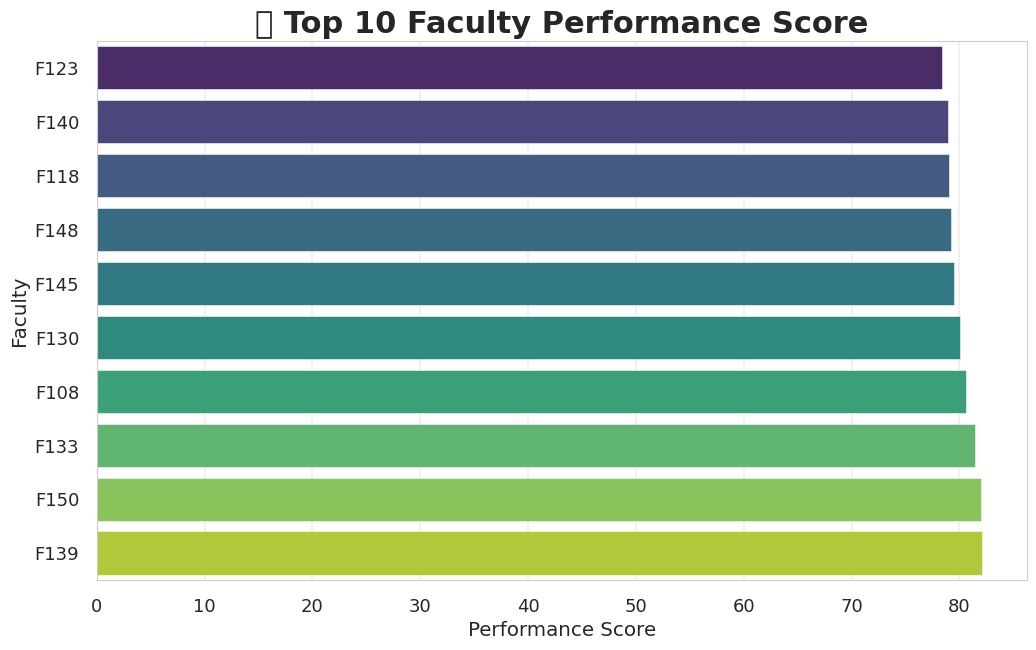

/tmp/ipython-input-798895277.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


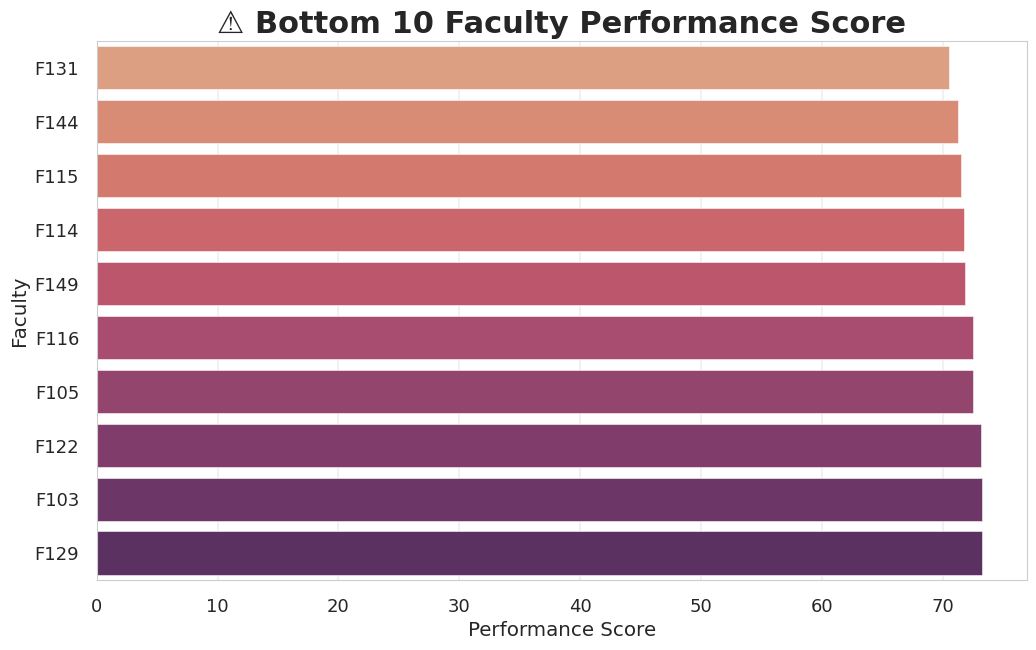

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


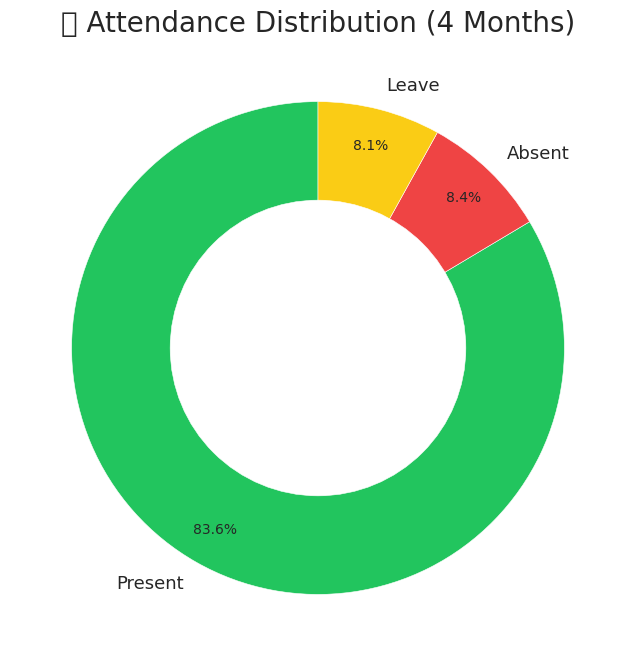

/tmp/ipython-input-798895277.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


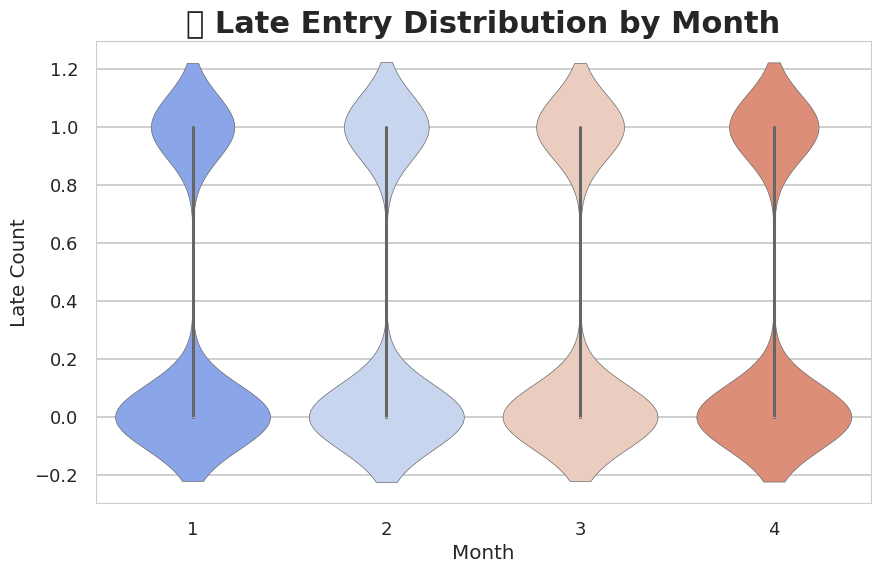

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Custom Stylish Theme
plt.style.use("seaborn-v0_8-talk")
sns.set_palette("crest")
sns.set_style("whitegrid")

# ---------------------------
# MONTHLY ATTENDANCE TREND
# ---------------------------
trend = df.groupby("month")["status"].apply(lambda x: (x=="present").mean())

plt.figure(figsize=(10,6))
plt.plot(
    trend.index,
    trend.values,
    marker='o',
    linewidth=3,
    markersize=12,
    color="#4F46E5",        # Indigo
    markerfacecolor="#9333EA",  # Neon Purple
    markeredgewidth=2,
    alpha=0.9
)

plt.fill_between(trend.index, trend.values, color="#6366F1", alpha=0.3)

plt.title("📈 Monthly Attendance Trend (Jan–Apr)", fontsize=22, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Attendance Rate", fontsize=14)
plt.xticks([1,2,3,4], ["Jan", "Feb", "Mar", "Apr"])
plt.grid(alpha=0.3)
plt.show()


# ---------------------------
# HEATMAP (Late Pattern)
# ---------------------------
pivot = df.pivot_table(
    index="day_of_week",
    columns="month",
    values="late",
    aggfunc="sum"
).reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10,6))

sns.heatmap(
    pivot,
    annot=True,
    fmt="d",
    linewidths=1,
    cmap="rocket_r",          # Premium theme
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title("🔥 Late Entry Heatmap — Day vs Month", fontsize=22, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


# ---------------------------
# BAR CHART — Top 10 Faculty Performance
# ---------------------------
plt.figure(figsize=(12,7))
top10_sorted = top10.sort_values("performance_score")

sns.barplot(
    x=top10_sorted["performance_score"],
    y=top10_sorted.index,
    palette="viridis"
)

plt.title("🏆 Top 10 Faculty Performance Score", fontsize=22, fontweight="bold")
plt.xlabel("Performance Score")
plt.ylabel("Faculty")
plt.grid(axis='x', alpha=0.3)
plt.show()


# ---------------------------
# BAR CHART — Bottom 10 Faculty Performance
# ---------------------------
plt.figure(figsize=(12,7))
bottom10_sorted = bottom10.sort_values("performance_score")

sns.barplot(
    x=bottom10_sorted["performance_score"],
    y=bottom10_sorted.index,
    palette="flare"
)

plt.title("⚠️ Bottom 10 Faculty Performance Score", fontsize=22, fontweight="bold")
plt.xlabel("Performance Score")
plt.ylabel("Faculty")
plt.grid(axis='x', alpha=0.3)
plt.show()


# ---------------------------
# PIE CHART — Attendance Split
# ---------------------------
present_total = (df["status"]=="present").sum()
absent_total = (df["status"]=="absent").sum()
leave_total  = (df["status"]=="on_leave").sum()

plt.figure(figsize=(8,8))
plt.pie(
    [present_total, absent_total, leave_total],
    labels=["Present","Absent","Leave"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#22C55E", "#EF4444", "#FACC15"],  # Green, Red, Yellow
    pctdistance=0.85
)

# Donut style
center_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("🟢 Attendance Distribution (4 Months)", fontsize=20)
plt.show()


# ---------------------------
# VIOLIN PLOT — Late Entries Distribution
# ---------------------------
plt.figure(figsize=(10,6))

sns.violinplot(
    x=df["month"],
    y=df["late"],
    palette="coolwarm"
)

plt.title("🎻 Late Entry Distribution by Month", fontsize=22, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Late Count")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def analyze_faculty(df, faculty_id):
    # FILTER FACULTY DATA
    fdf = df[df["faculty_id"].astype(str) == str(faculty_id)]

    # If no data -> return error
    if fdf.empty:
        return {
            "error": f"No records found for Faculty ID {faculty_id}",
            "faculty_id": faculty_id
        }

    # SAFE DATE PARSING
    try:
        fdf["date"] = pd.to_datetime(fdf["date"])
    except:
        pass

    # ADD MISSING COLUMNS SAFELY
    for col in ["late", "early_exit", "classes_taken", "classes_scheduled", "classes_missed"]:
        if col not in fdf.columns:
            fdf[col] = 0

    # ADD DERIVED COLUMNS
    fdf["month"] = fdf["date"].dt.month
    fdf["day_of_week"] = fdf["date"].dt.day_name()

    # BASIC COUNT METRICS
    total_days = len(fdf)
    present_days = (fdf["status"] == "present").sum()
    absent_days = (fdf["status"] == "absent").sum()
    leave_days = (fdf["status"] == "on_leave").sum()

    late_count = fdf["late"].sum()
    early_exit_count = fdf["early_exit"].sum()

    classes_taken = fdf["classes_taken"].sum()
    classes_scheduled = fdf["classes_scheduled"].sum()
    classes_missed = fdf["classes_missed"].sum()

    # PREVENT DIVISION ERRORS
    attendance_rate = round((present_days / total_days) * 100, 2) if total_days else 0
    class_eff = round((classes_taken / classes_scheduled) * 100, 2) if classes_scheduled else 0
    punctuality = round((1 - late_count / max(present_days, 1)) * 100, 2)

    # FINAL PERFORMANCE SCORE
    performance_score = round(
        attendance_rate * 0.5 +
        class_eff * 0.3 +
        punctuality * 0.2, 2
    )

    # TREND OVER TIME
    trend = fdf.groupby("date")["status"].apply(lambda x: (x=="present").mean()).to_dict()

    # HEATMAP (Day vs Month)
    heatmap = fdf.pivot_table(
        index="day_of_week",
        columns="month",
        values="late",
        aggfunc="sum",
        fill_value=0
    ).to_dict()

    # AI INSIGHTS
    insights = []

    if attendance_rate < 70:
        insights.append("⚠ Attendance is critically low.")

    if class_eff < 75:
        insights.append("⚠ Class efficiency is low.")

    if late_count > 10:
        insights.append("⚠ Frequent late entry detected.")

    if performance_score > 85:
        insights.append("🌟 Excellent overall performance!")

    if not insights:
        insights.append("👍 Stable performance observed.")

    # FINAL OUTPUT
    return {
        "faculty_id": faculty_id,
        "attendance_rate": attendance_rate,
        "absent_days": absent_days,
        "leave_days": leave_days,
        "class_efficiency": class_eff,
        "punctuality": punctuality,
        "performance_score": performance_score,
        "late_count": late_count,
        "early_exit_count": early_exit_count,
        "classes_taken": classes_taken,
        "classes_missed": classes_missed,
        "trend": trend,
        "heatmap": heatmap,
        "insights": insights
    }


In [ ]:
import matplotlib.pyplot as plt

def plot_attendance_trend(result):
    trend = result["trend"]

    dates = list(trend.keys())
    values = list(trend.values())

    plt.figure()
    plt.plot(dates, values)
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Presence Rate")
    plt.title(f"Faculty {result['faculty_id']} - Attendance Trend")
    plt.tight_layout()
    plt.show()
